Analysis for San Diego County

In [2]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [3]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
180362,5/26/2020,Vance,North Carolina,37181.0,250,18
249363,6/17/2020,Mercer,West Virginia,54055.0,15,0
217445,6/7/2020,Benton,Oregon,41003.0,62,5
106064,5/1/2020,McPherson,South Dakota,46089.0,1,0
396681,8/3/2020,Greenup,Kentucky,21089.0,89,1


In [4]:
# find sd county
san_diego = counties[(counties['county']=='San Diego') & (counties['state']=='California')]
san_diego.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
san_diego['datetime'] = pd.to_datetime(san_diego['date'])


In [6]:
#san_diego['datetime'] = pd.to_datetime(san_diego['date'])
#san_diego

san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()

# Groupby to consolidate cases by entire region
san_diego = san_diego.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
san_diego['datetime'] = pd.to_datetime(san_diego['datetime'])
san_diego['day'] = san_diego['datetime'].map(lambda x: x.day)
san_diego['month'] = san_diego['datetime'].map(lambda x: x.month)
san_diego['year'] = san_diego['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    #us['growth_rate'] = us['cases'].pct_change()
    # Drop null value
san_diego = san_diego.dropna()
san_diego = san_diego
#san_diego.tail(10)


In [7]:
san_diego['growth_rate'] = san_diego['deaths'].pct_change()

In [8]:
san_diego

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,2020-02-10,118,6073.0,1,0,10,2,2020,NaN
1,2020-02-11,128,6073.0,1,0,11,2,2020,NaN
2,2020-02-12,138,6073.0,1,0,12,2,2020,NaN
3,2020-02-13,149,6073.0,1,0,13,2,2020,NaN
4,2020-02-14,160,6073.0,1,0,14,2,2020,NaN
...,...,...,...,...,...,...,...,...,...
272,2020-11-08,709783,6073.0,60232,908,8,11,2020,0.000000
273,2020-11-09,713027,6073.0,60633,938,9,11,2020,0.033040
274,2020-11-10,716271,6073.0,61116,915,10,11,2020,-0.024520
275,2020-11-11,719515,6073.0,61148,915,11,11,2020,0.000000


In [9]:
sd = san_diego.drop([273])

In [10]:
sd

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,2020-02-10,118,6073.0,1,0,10,2,2020,NaN
1,2020-02-11,128,6073.0,1,0,11,2,2020,NaN
2,2020-02-12,138,6073.0,1,0,12,2,2020,NaN
3,2020-02-13,149,6073.0,1,0,13,2,2020,NaN
4,2020-02-14,160,6073.0,1,0,14,2,2020,NaN
...,...,...,...,...,...,...,...,...,...
271,2020-11-07,706539,6073.0,59719,908,7,11,2020,0.001103
272,2020-11-08,709783,6073.0,60232,908,8,11,2020,0.000000
274,2020-11-10,716271,6073.0,61116,915,10,11,2020,-0.024520
275,2020-11-11,719515,6073.0,61148,915,11,11,2020,0.000000


In [11]:
sd.diff()

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
271,1 days,3243.0,0.0,540.0,1.0,1.0,0.0,0.0,-0.002216
272,1 days,3244.0,0.0,513.0,0.0,1.0,0.0,0.0,-0.001103
274,2 days,6488.0,0.0,884.0,7.0,2.0,0.0,0.0,-0.024520
275,1 days,3244.0,0.0,32.0,0.0,1.0,0.0,0.0,0.024520


In [12]:
# Run model predicting cases

def make_models():
    ''' function to run deaths model'''
    # Make the model
    SD_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = sd[["day", "month", "year"]]
    y_Us = sd[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    SD_model.fit(X_train_Us, y_train_Us)
    SD_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = SD_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,973.730342
1,27,11,2020,2020-11-27,1002.146971
2,4,12,2020,2020-12-04,1027.882972
3,11,12,2020,2020-12-11,1056.299600
4,18,12,2020,2020-12-18,1084.716228
5,25,12,2020,2020-12-25,1113.132856


In [13]:
# assign modle output to variable
weeks_cases = make_models()

In [14]:
weeks_cases

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,973.730342
1,27,11,2020,2020-11-27,1002.146971
2,4,12,2020,2020-12-04,1027.882972
3,11,12,2020,2020-12-11,1056.299600
4,18,12,2020,2020-12-18,1084.716228
5,25,12,2020,2020-12-25,1113.132856


deaths

In [15]:
weeks_deaths = make_models()

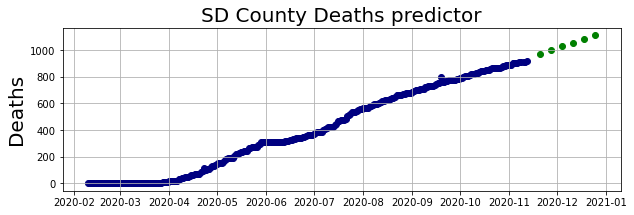

In [16]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(weeks_deaths['datetime'],weeks_deaths['predicted_deaths'],c='g',)
plt.scatter(sd['datetime'],sd['deaths'],c='#000080',)
plt.grid(True)
plt.title('SD County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()

# CHECKING PREDICTIONS

In [24]:
weeks_deaths

actual = ['960', 'tbd', 'tbd', 'tbd','tbd','tbd'] 
  
# Using 'Address' as the column name 
# and equating it to the list 
weeks_deaths['actual_deaths'] = actual
weeks_deaths

,day,month,year,datetime,predicted_deaths,actual_deaths
0,20,11,2020,2020-11-20,973.730342,960
1,27,11,2020,2020-11-27,1002.146971,tbd
2,4,12,2020,2020-12-04,1027.882972,tbd
3,11,12,2020,2020-12-11,1056.299600,tbd
4,18,12,2020,2020-12-18,1084.716228,tbd
5,25,12,2020,2020-12-25,1113.132856,tbd


In [27]:
#extract nedded columns
weeks_deaths[['datetime','predicted_deaths','actual_deaths']].copy()

,datetime,predicted_deaths,actual_deaths
0,2020-11-20,973.730342,960
1,2020-11-27,1002.146971,tbd
2,2020-12-04,1027.882972,tbd
3,2020-12-11,1056.299600,tbd
4,2020-12-18,1084.716228,tbd
5,2020-12-25,1113.132856,tbd


In [28]:
# check types
weeks_deaths.dtypes

day                          int64
month                        int64
year                         int64
datetime            datetime64[ns]
predicted_deaths           float64
actual_deaths               object
dtype: object

In [23]:
weeks_deaths['datetime'].astype('object')

0    2020-11-20 00:00:00
1    2020-11-27 00:00:00
2    2020-12-04 00:00:00
3    2020-12-11 00:00:00
4    2020-12-18 00:00:00
5    2020-12-25 00:00:00
Name: datetime, dtype: object

In [25]:
weeks_deaths.plot()

ValueError: view limit minimum -36885.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [18]:
#weeks_deaths.plot()

weeks_deaths.datetime = pd.to_datetime(weeks_deaths.datetime)

print(weeks_deaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   day               6 non-null      int64         
 1   month             6 non-null      int64         
 2   year              6 non-null      int64         
 3   datetime          6 non-null      datetime64[ns]
 4   predicted_deaths  6 non-null      float64       
 5   actual_deaths     6 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 416.0+ bytes
None


In [21]:
weeks_deaths=weeks_deaths


In [22]:
weeks_deaths.plot()

ValueError: view limit minimum -36885.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

# # CHECKING PREDICTIONS

In [20]:
# find sd county

checking = pd.read_csv('us-counties_checking_predicts.csv')
san = checking[(checking['county']=='San Diego') & (checking['state']=='California')]
san.tail(20)

,date,county,state,fips,cases,deaths
690321,11/2/2020,San Diego,California,6073.0,57472,891
693564,11/3/2020,San Diego,California,6073.0,57765,901
696807,11/4/2020,San Diego,California,6073.0,58169,904
700052,11/5/2020,San Diego,California,6073.0,58699,904
703296,11/6/2020,San Diego,California,6073.0,59179,907
706539,11/7/2020,San Diego,California,6073.0,59719,908
709783,11/8/2020,San Diego,California,6073.0,60232,908
713027,11/9/2020,San Diego,California,6073.0,60633,938
716271,11/10/2020,San Diego,California,6073.0,61116,915
719515,11/11/2020,San Diego,California,6073.0,61148,915
